In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.shape[0]

60000

In [8]:

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:


# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:


#Build CNN model
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(28, 28, 1)))

# Convolution Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer 
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer — 10 classes
model.add(Dense(10, activation='softmax'))

In [11]:


#  Compile CNN
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [12]:

# Step 6: Train model
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5
)

Epoch 1/5
469/469 [==============================] - 15s 16ms/step - loss: 1.0381 - accuracy: 0.9391
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0175 - accuracy: 0.9941
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0181 - accuracy: 0.9940


In [13]:


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)




Test Accuracy: 0.9850000143051147


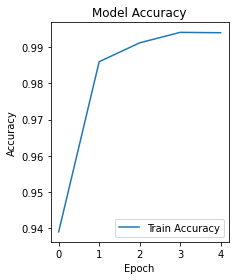

In [17]:

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

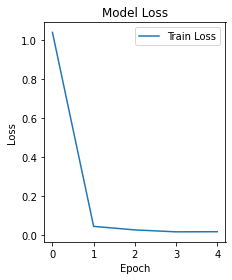

In [18]:


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Example prediction
import numpy as np
sample = X_test[0].reshape(1, 28, 28, 1)
prediction = model.predict(sample)
print("Predicted Digit:", np.argmax(prediction))

Predicted Digit: 7


In [20]:
sample = X_test[150].reshape(1, 28, 28, 1)
prediction = model.predict(sample)
print("Predicted Digit:", np.argmax(prediction))

Predicted Digit: 9


In [21]:
sample = X_test[15].reshape(1, 28, 28, 1)
prediction = model.predict(sample)
print("Predicted Digit:", prediction)

Predicted Digit: [[1.3164466e-16 3.7689270e-14 3.9322471e-19 6.2923382e-11 5.9695784e-19
  1.0000000e+00 2.2169750e-13 4.2690375e-17 7.1748385e-13 8.5104673e-14]]
